In [2]:
import os
os.chdir("../") # This is necessary to find utils module


In [236]:
import importlib
import matplotlib.pyplot as plt
import pickle
from seisbench.data import WaveformDataset

import utils.visualisations as vis

with open("../results/evaluation/metrics/eqt_metrics_no_res_lstm.pickle", "rb") as f:
    metrics_none = pickle.load(f)

with open("../results/evaluation/metrics/eqt_metrics_reduced_encoder.pickle", "rb") as f:
    metrics_reduced = pickle.load(f)

with open("../results/evaluation/metrics_dropout/EQTransformer_metrics.pickle", "rb") as f:
    metrics_normal = pickle.load(f)

with open("../results/evaluation/metrics_dropout/EQTransformer_snr.pickle", "rb") as f:
    metrics_snr = pickle.load(f)

with open("../results/evaluation/metrics_dropout/EQTransformer_pred.pickle", "rb") as f:
    metrics_pred = pickle.load(f)

with open("../results/evaluation/metrics_dropout/EQTransformer_true.pickle", "rb") as f:
    metrics_true = pickle.load(f)

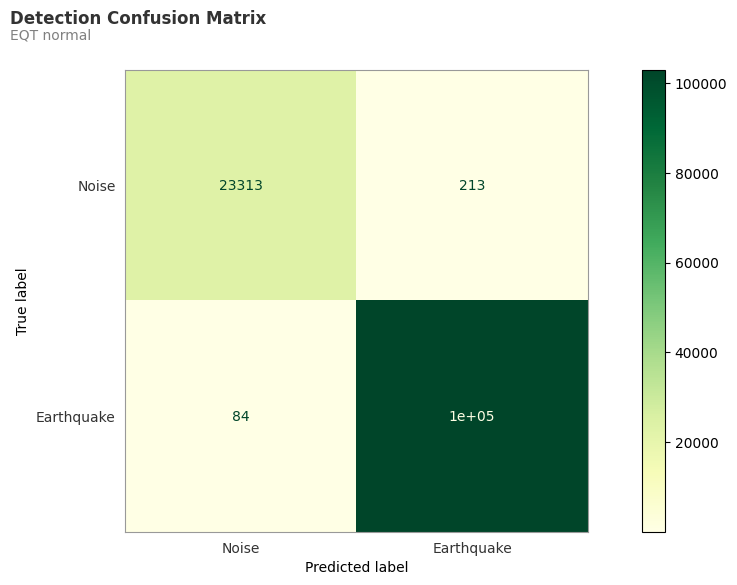

In [225]:
importlib.reload(vis)
vis.confusion_matrix(metrics_normal, subtitle='EQT normal');

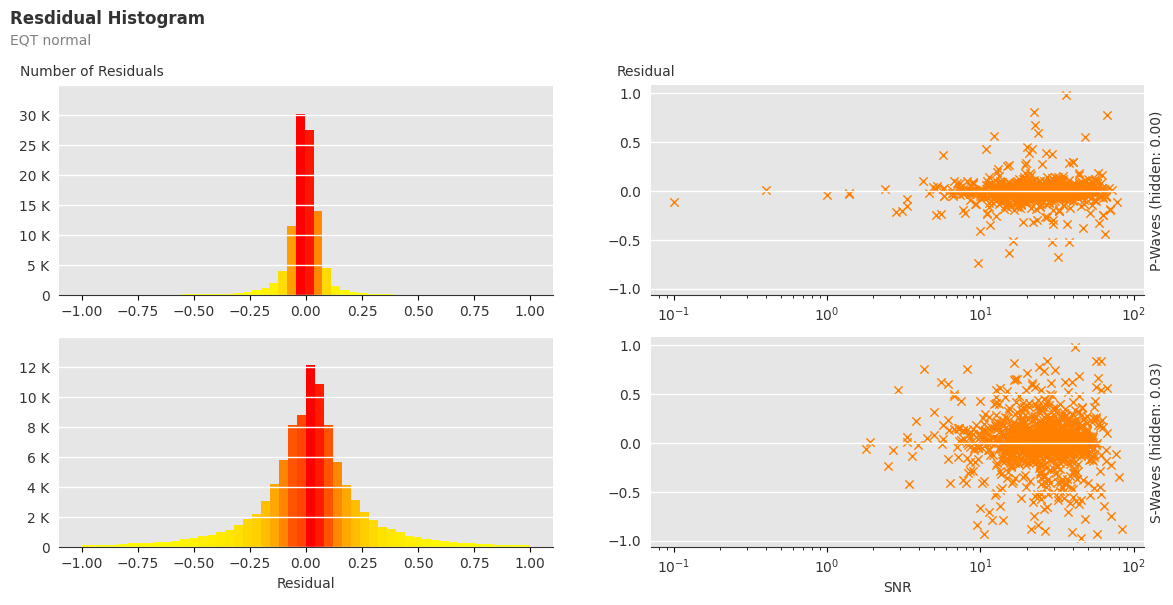

In [227]:
importlib.reload(vis)
vis.residual_histogram(metrics_normal, subtitle='EQT normal');

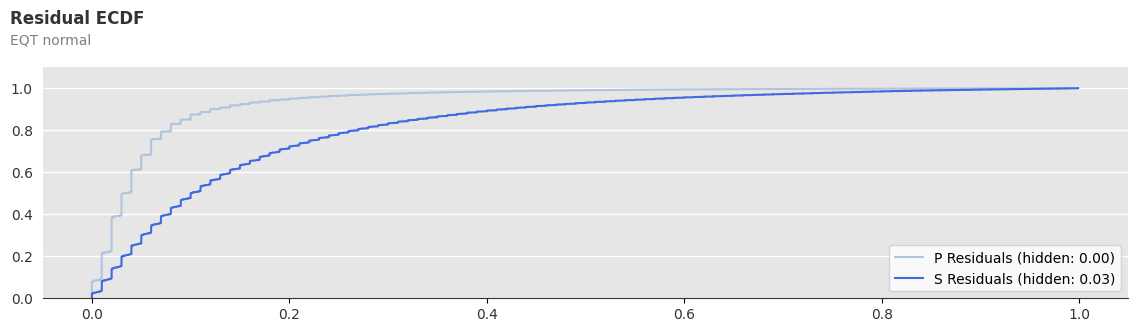

In [228]:
importlib.reload(vis)
vis.residual_ecdf(metrics_normal, subtitle='EQT normal');

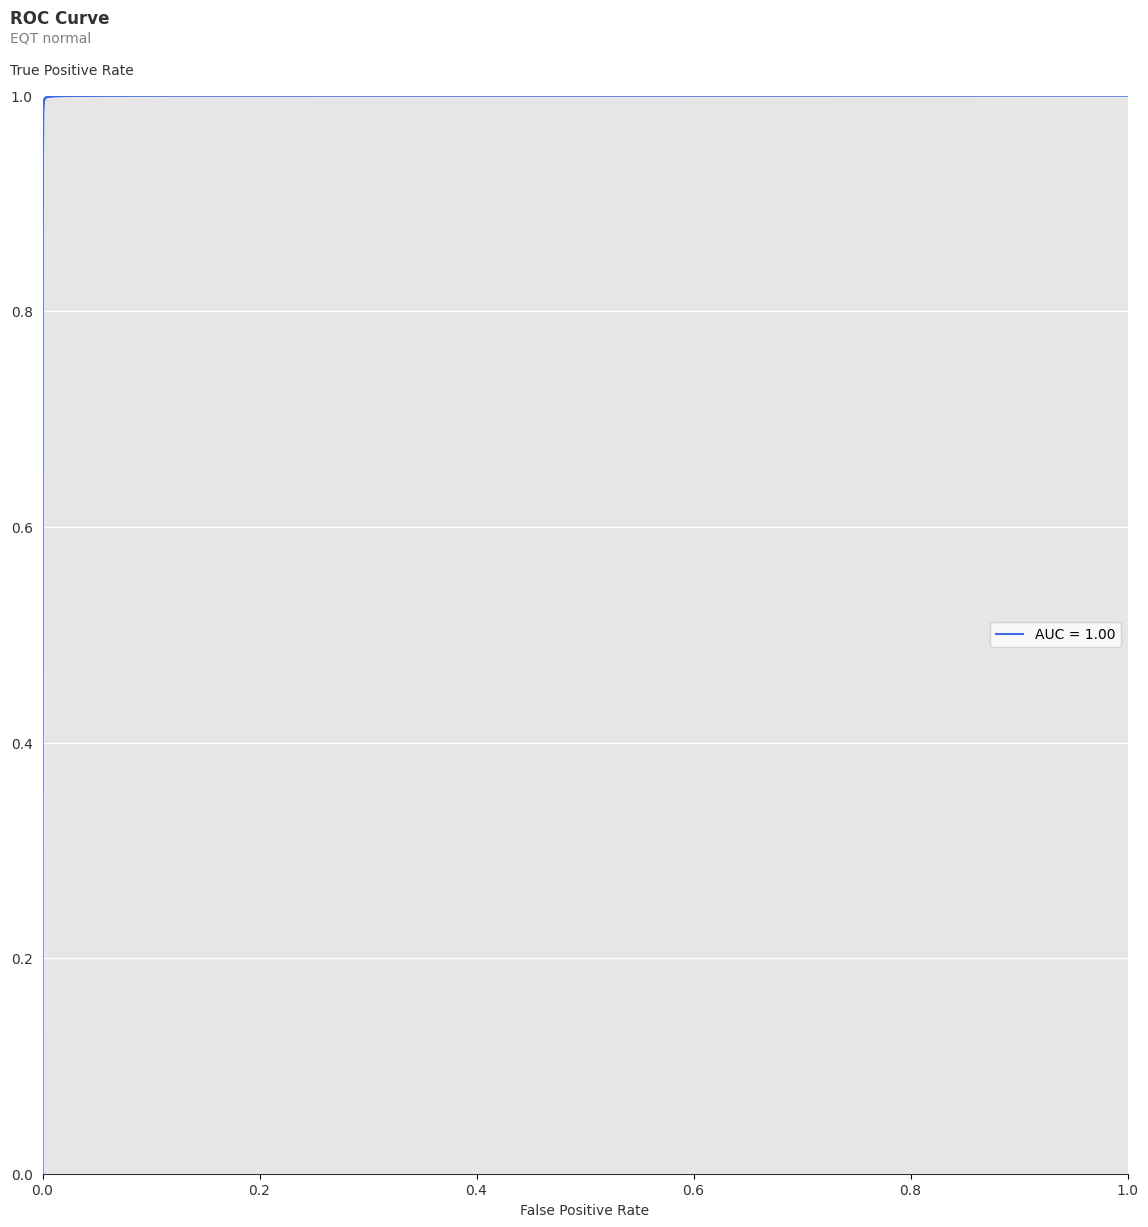

In [233]:
importlib.reload(vis)
vis.roc_plot(metrics_normal, subtitle='EQT normal');

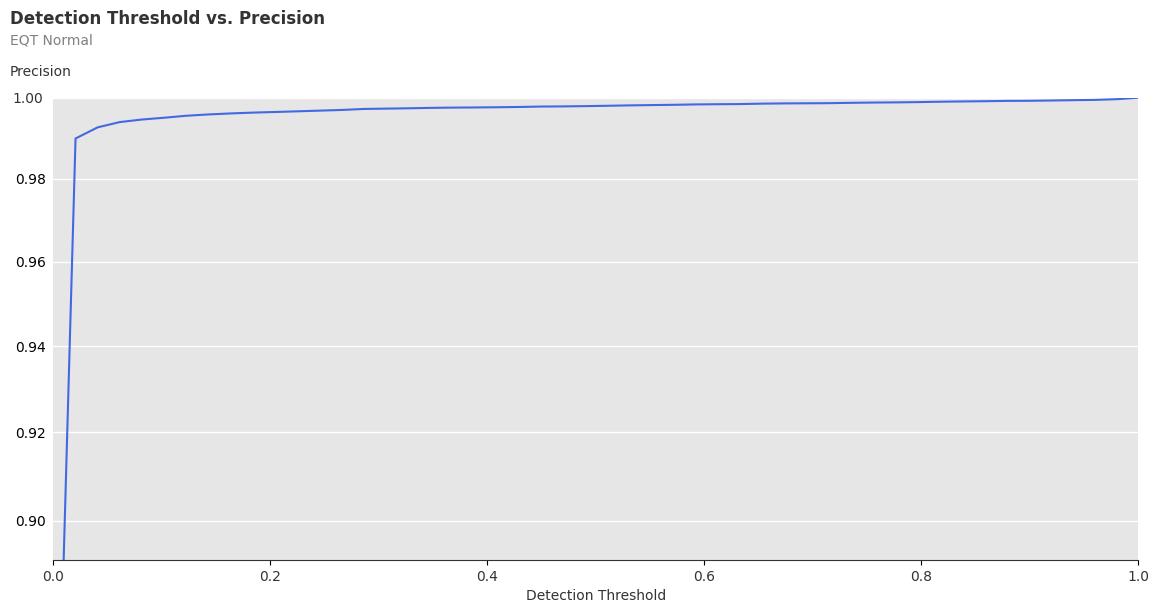

In [235]:
importlib.reload(vis)
vis.detection_treshold_vs_prec(metrics_true, metrics_pred, metrics_snr, subtitle='EQT Normal');

In [238]:
data = WaveformDataset("/data/STEAD_dataset/.seisbench/datasets/stead/")

In [297]:
for k, v in data.get_sample(0)[1].items():
  print(f'{k}: {v}')

index: 0
station_network_code: TA
station_code: 109C
trace_channel: HH
station_latitude_deg: 32.8889
station_longitude_deg: -117.1051
station_elevation_m: 150.0
trace_p_arrival_sample: nan
trace_p_status: nan
trace_p_weight: nan
path_p_travel_sec: nan
trace_s_arrival_sample: nan
trace_s_status: nan
trace_s_weight: nan
source_id: nan
source_origin_time: nan
source_origin_uncertainty_sec: nan
source_latitude_deg: nan
source_longitude_deg: nan
source_error_sec: nan
source_gap_deg: nan
source_horizontal_uncertainty_km: nan
source_depth_km: nan
source_depth_uncertainty_km: nan
source_magnitude: nan
source_magnitude_type: nan
source_magnitude_author: nan
source_mechanism_strike_dip_rake: nan
source_distance_deg: nan
source_distance_km: nan
path_back_azimuth_deg: nan
trace_snr_db: nan
trace_coda_end_sample: nan
trace_start_time: 2015-10-21 05:55:00
trace_category: noise
trace_name: bucket17$0,:3,:6000
split: dev
trace_name_original: 109C.TA_201510210555_NO
trace_chunk: 
trace_sampling_rate_hz

In [383]:
data.get_sample(1231231)[1]['trace_component_order']

'ZNE'

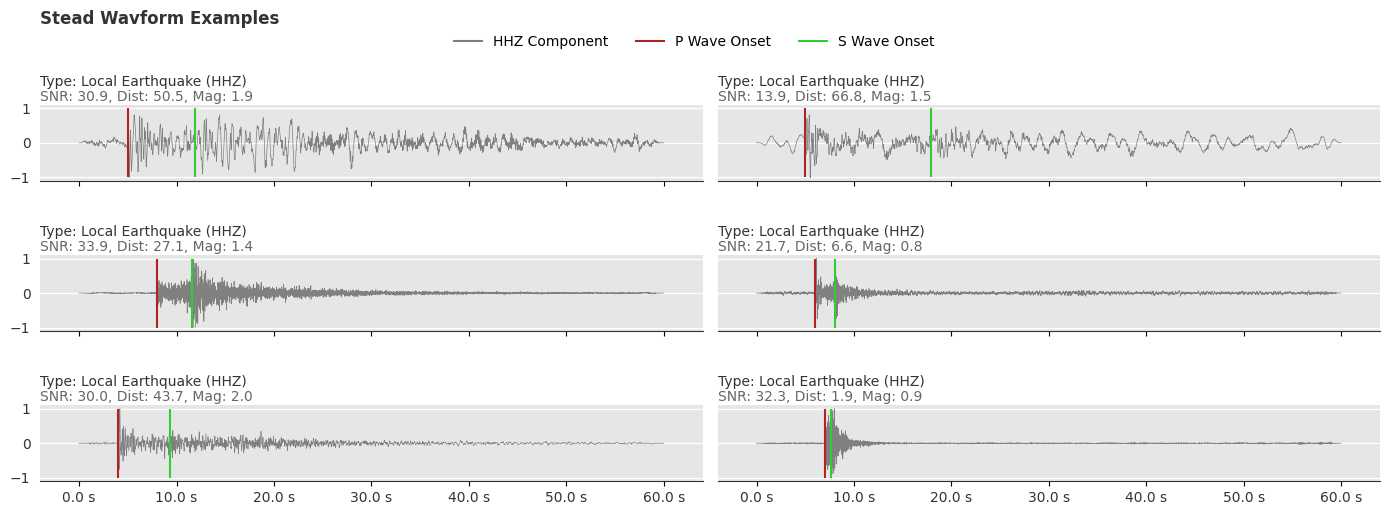

In [425]:
importlib.reload(vis)
vis.plot_waveforms(data, nrows=3, ncols=2);

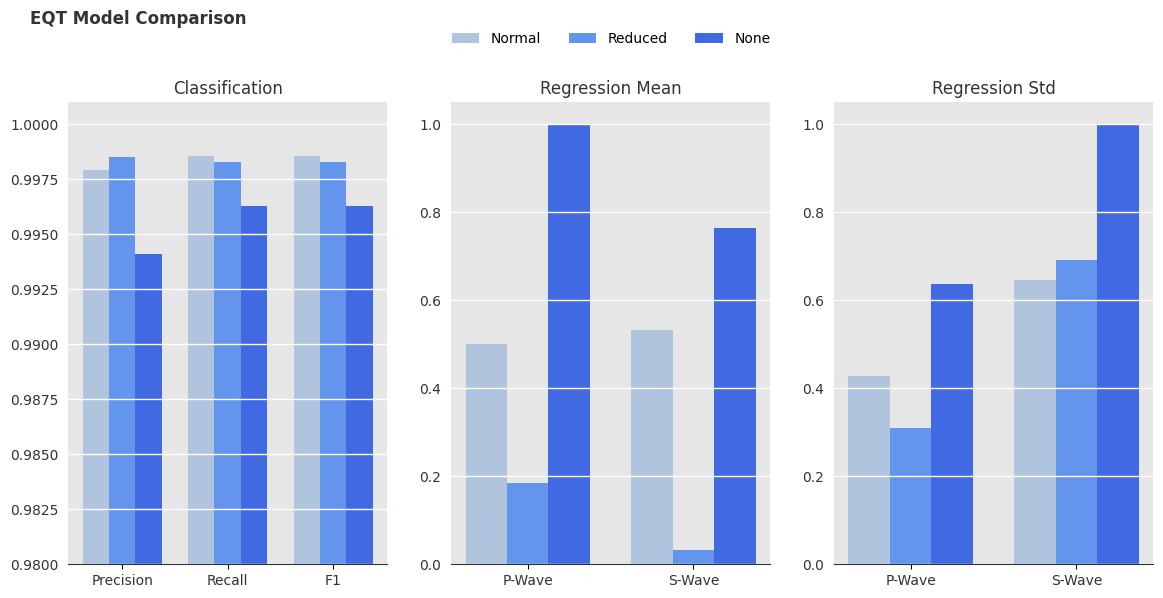

In [186]:
importlib.reload(vis)
vis.model_comparison({'Normal': metrics_normal, 'Reduced': metrics_reduced, 'None': metrics_none});